# Exploring the UCF 101 Action Dataset
> Generate image frames from video

- toc: true 
- badges: true
- comments: true
- categories: [ucf 101, video data, image frames]

From the [UCF 101 dataset website](https://www.crcv.ucf.edu/data/UCF101.php): UCF101 is an action recognition data set of realistic action videos, collected from YouTube, having 101 action categories. We [downloaded](http://www.thumos.info/download.html) a zipped file containing 13320 trimmed videos, each including one action, and a text file containing the list of action classes and their numerical index.

## List files available

Unzip the .avi files into a `VIDEO_DIR` folder.

In [3]:
import glob

video_files = glob.glob(os.path.join(os.environ["VIDEO_DIR"], "*.avi"))

In [4]:
video_files[0:2]

['/Users/tmartins/projects/data/ucf_101/UCF101/v_CricketBowling_g01_c06.avi',
 '/Users/tmartins/projects/data/ucf_101/UCF101/v_BreastStroke_g06_c01.avi']

## Convert from .avi to .mp4

There is better support for .mp4 files, so we will convert the .avi files to .mp4 using `ffmpeg`. The code below requires that your machine have ffmpeg installed.

In [ ]:
import subprocess

def convert_from_avi_to_mp4(file_name):
    outputfile = file_name.lower().replace(".avi", ".mp4")
    subprocess.call(['ffmpeg', '-i', file_name, outputfile])  

The code below takes quite a while and could be sped up by using multi-processing:

In [ ]:
for file_name in video_files:
    convert_from_avi_to_mp4(file_name)

## Display .mp4 files

Once all the files are converted we can list all the .mp4 files

In [5]:
mp4_video_files = glob.glob(os.path.join(os.environ["VIDEO_DIR"], "*.mp4"))
mp4_video_files[0:2]

['/Users/tmartins/projects/data/ucf_101/UCF101/v_knitting_g17_c03.mp4',
 '/Users/tmartins/projects/data/ucf_101/UCF101/v_floorgymnastics_g25_c05.mp4']

Select one of the videos at random for illustration:

In [6]:
from IPython.display import Video
from random import choice, seed

seed(457)
video_path = choice(mp4_video_files)
video_path

'/Users/tmartins/projects/data/ucf_101/UCF101/v_soccerjuggling_g01_c02.mp4'

Display the selected video:

In [7]:
Video(video_path, embed=True)

## Generate image frames from video

A video is a sequence of image frames. In this section we want to create a function that generates image frames at a given rate of frames per second and then select a specific number of equally spaced image frames to be kept for further processing.

In [8]:
import numpy as np

def sample_images(images, number_to_sample):
    """
    Sample equally spaced frames from a list of image frames
    
    :param images: a list of image frames.
    :param number_to_sample: int representing the number os frames to sample.
    
    :return: a numpy array containing the sample of frames.    
    """
    if number_to_sample < len(images):
        idx = np.round(np.linspace(0, len(images) - 1, number_to_sample)).astype(int)
        return np.array(images)[idx]
    else:
        return np.array(images)

In [9]:
import imageio

def extract_images(video_path, number_frames):
    """
    Extract equally spaced frames from a video.
    
    :param video_path: Full .mp4 video path.
    :param number_frames: Number of frames to sample.
    
    :return: a numpy array containing the sample of frames.    
    """
    reader = imageio.get_reader(
        video_path, 
        fps=1
    )
    frames = []
    for i, im in enumerate(reader):
        frames.append(im)
    return sample_images(frames, number_frames)

Generate 4 equally spaced frames from the video displayed above.

In [10]:
images = extract_images(video_path, 4)

Plot the extracted frames:

In [11]:
import matplotlib.pyplot as plt

def plot_images(images):
    fig = plt.figure(figsize=(10, 10))
    for idx, image in enumerate(images):
        sub = fig.add_subplot(2,2,idx+1)
        imgplot = plt.imshow(image)
    plt.tight_layout()

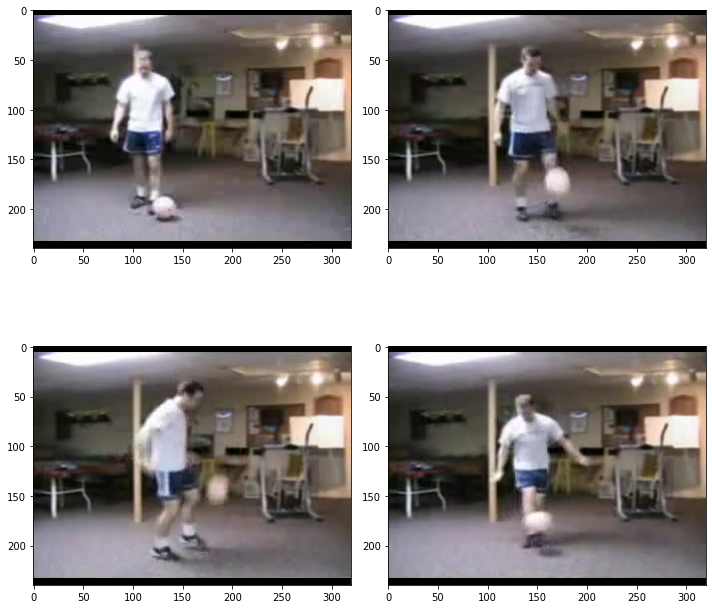

In [12]:
plot_images(images)